In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# setup pretty plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)


In [9]:
print("👉 Please upload Data_Train.csv file...")
uploaded = files.upload()

# after upload, read the CSV
df = pd.read_csv("Data_Train.csv")
print("✅ File loaded successfully!")
df.head()

👉 Please upload Data_Train.csv file...


Saving Data_Train.csv to Data_Train (1).csv
✅ File loaded successfully!


,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
0,IndiGo,24/03/2019,Banglore,22:20,New Delhi,0,3897
1,Air India,1/05/2019,Kolkata,05:50,Banglore,0,7662
2,Jet Airways,9/06/2019,Delhi,09:25,Cochin,0,13882
3,IndiGo,12/05/2019,Kolkata,18:05,Banglore,0,6218
4,IndiGo,01/03/2019,Banglore,16:50,New Delhi,0,13302


In [10]:
print("\n--- Basic Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistical Summary ---")
print(df.describe())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB

--- Missing Values ---
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64

--- Statistical Summary ---
         Class         Price
count  10683.0  10683.000000
mean       0.0   9087.064121
std        0.0   4611.359167
min        0.0   1759.000000
25%        0.0   5277.000000
50%        0.0   8372.000000

In [20]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# extract date parts
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Weekday'] = df['Date_of_Journey'].dt.day_name()

print("\nDate columns created:", df[['Date_of_Journey','Day','Month','Weekday']].head())


Date columns created:   Date_of_Journey  Day  Month    Weekday
0      2019-03-24   24      3     Sunday
1      2019-05-01    1      5  Wednesday
2      2019-06-09    9      6     Sunday
3      2019-05-12   12      5     Sunday
4      2019-03-01    1      3     Friday


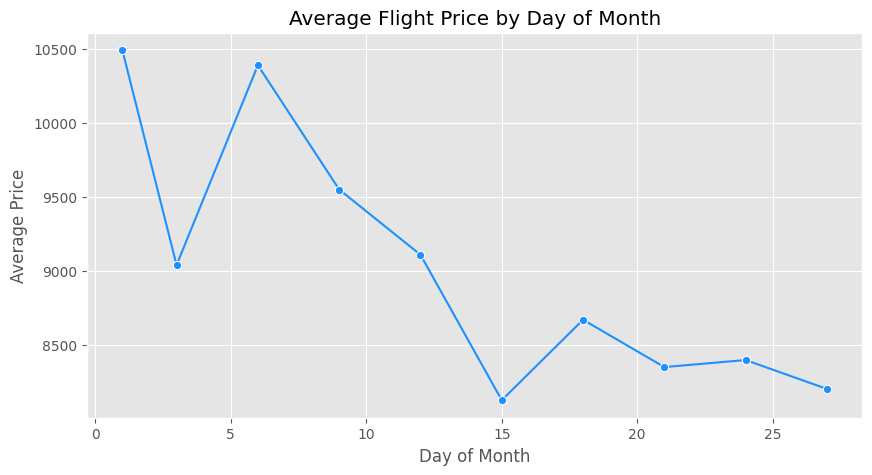

In [14]:
day_avg = df.groupby('Day')['Price'].mean().reset_index()

sns.lineplot(x='Day', y='Price', data=day_avg, marker='o', color='dodgerblue')
plt.title('Average Flight Price by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Price')
plt.show()

/tmp/ipython-input-2476701505.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Price', data=weekday_avg, palette='magma')


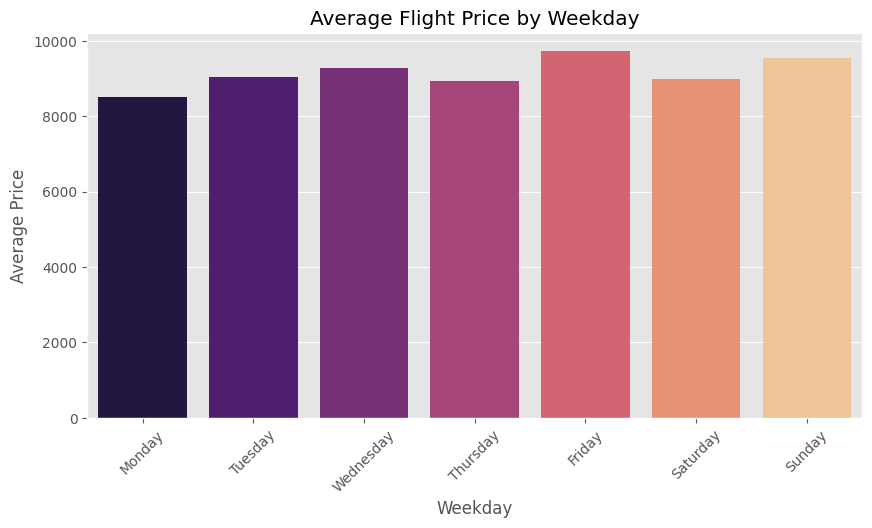

In [15]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_avg = (df.groupby('Weekday')['Price']
                 .mean()
                 .reindex(weekday_order)
                 .reset_index())

sns.barplot(x='Weekday', y='Price', data=weekday_avg, palette='magma')
plt.title('Average Flight Price by Weekday')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()


/tmp/ipython-input-2565943838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='coolwarm')


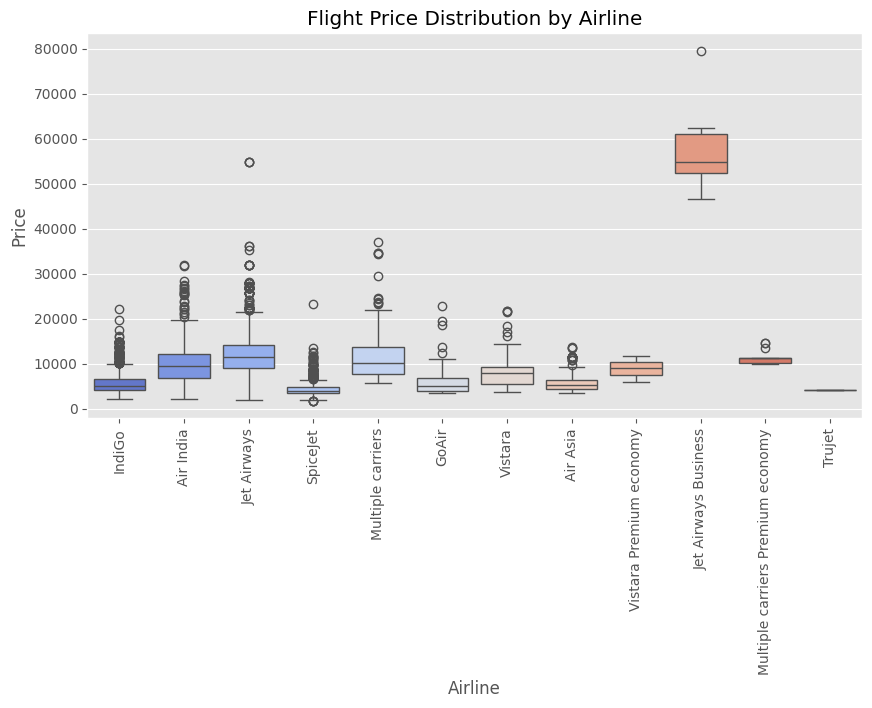

In [16]:
sns.boxplot(x='Airline', y='Price', data=df, palette='coolwarm')
plt.title('Flight Price Distribution by Airline')
plt.xticks(rotation=90)
plt.show()

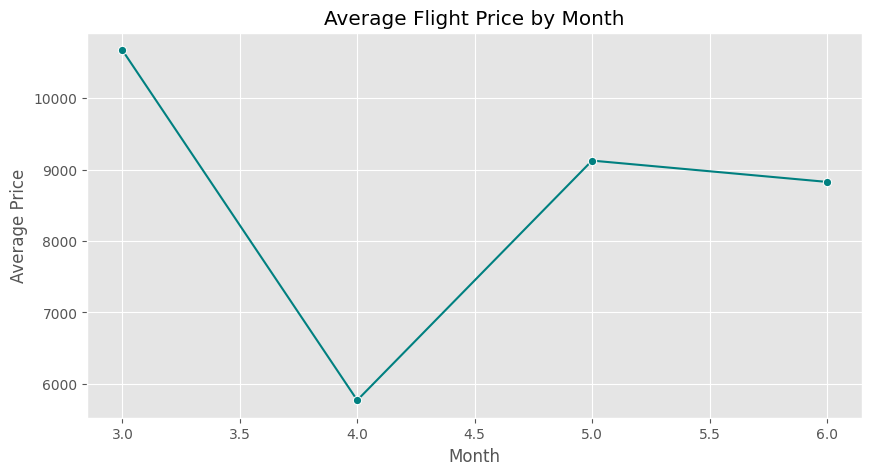

In [17]:
month_avg = df.groupby('Month')['Price'].mean().reset_index()

sns.lineplot(x='Month', y='Price', data=month_avg, marker='o', color='teal')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

In [18]:
df.to_csv("processed_data.csv", index=False)
print("✅ Cleaned dataset saved as processed_data.csv")


✅ Cleaned dataset saved as processed_data.csv
